In [3]:
import pandas as pd

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [5]:
pd.options.display.max_rows = 200

# Links

In [18]:
links = pd.read_json('data/domain-link-counts.json/part-00000-d73512e3-ea00-4314-a7b9-10ddcd09b8b2-c000.json', lines=True)

In [25]:
links.head(10)

,count,domain
0,13680070,nytimes.com
1,11969969,cnn.com
2,10128624,washingtonpost.com
3,8753521,thehill.com
4,7926865,theguardian.com
5,6793344,foxnews.com
6,6284801,bbc.co.uk
7,4526817,reuters.com
8,4328285,breitbart.com
9,4000125,huffingtonpost.com


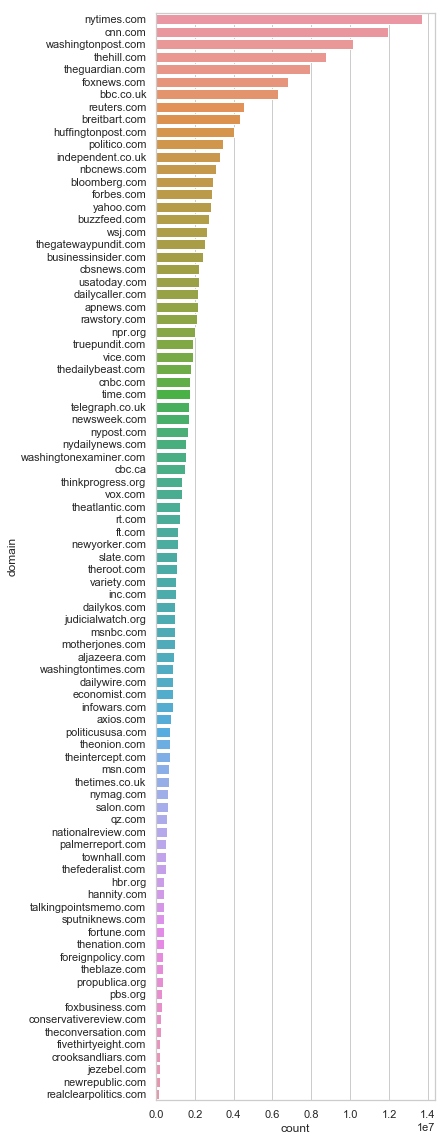

In [20]:
plt.figure(figsize=(5,20))
sns.barplot(x='count', y='domain', data=links)

# Articles

In [6]:
articles = pd.read_json('data/domain-article-counts.json/part-00000-b036e022-9b7c-45b5-bbe5-f675d92346f7-c000.json', lines=True)

In [7]:
articles

,count,domain
0,738455,yahoo.com
1,446349,reuters.com
2,404756,bbc.co.uk
3,285971,nytimes.com
4,282002,theguardian.com
5,252762,washingtonpost.com
6,250181,msn.com
7,231279,foxnews.com
8,227316,usatoday.com
9,219535,telegraph.co.uk


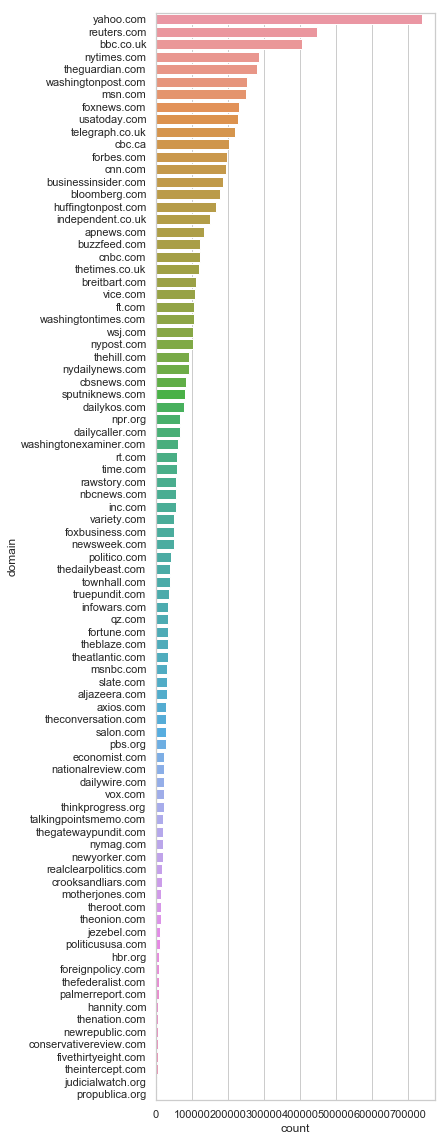

In [8]:
plt.figure(figsize=(5,20))
sns.barplot(x='count', y='domain', data=articles)

# Actors

In [26]:
actors = pd.read_json('data/domain-actor-counts.json/part-00000-c601ba35-01fb-495d-9d33-cd73662e594c-c000.json', lines=True)

In [27]:
actors.head(10)

,count,domain
0,3264129,cnn.com
1,2961816,nytimes.com
2,2093983,theguardian.com
3,2051944,bbc.co.uk
4,1979296,washingtonpost.com
5,1778213,thehill.com
6,1392153,huffingtonpost.com
7,1343282,buzzfeed.com
8,1305835,reuters.com
9,1290088,forbes.com


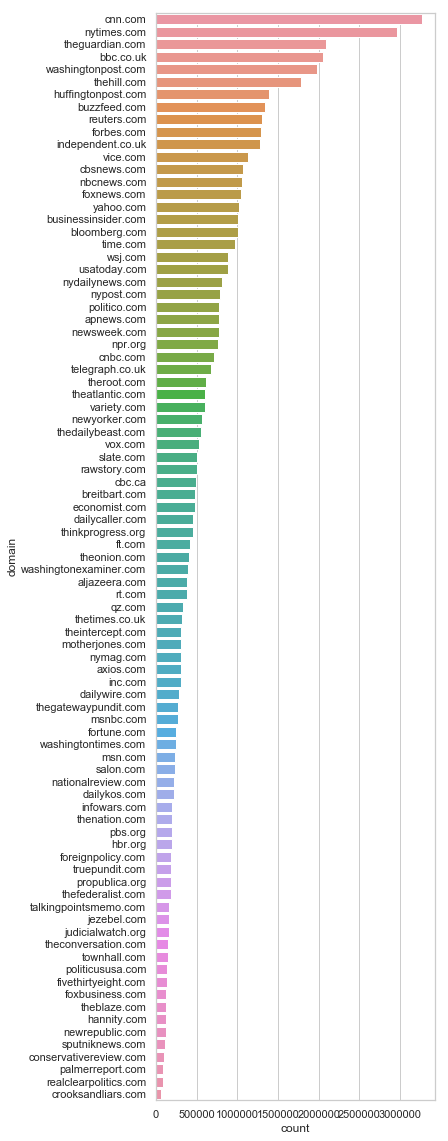

In [29]:
plt.figure(figsize=(5,20))
sns.barplot(x='count', y='domain', data=actors)

# Links per actor

In [39]:
links_actors = links.merge(actors, on='domain', suffixes=('_links', '_actors'))

In [40]:
links_actors['links_per_actor'] = links_actors.count_links / links_actors.count_actors
links_actors.sort_values('links_per_actor', ascending=False, inplace=True)

In [42]:
links_actors.head(10)

,count_links,domain,count_actors,links_per_actor
26,1887682,truepundit.com,181889,10.378209
18,2517069,thegatewaypundit.com,273136,9.215442
8,4328285,breitbart.com,484216,8.938748
5,6793344,foxnews.com,1044744,6.502401
48,1000671,judicialwatch.org,155419,6.438537
66,537216,palmerreport.com,90419,5.941406
2,10128624,washingtonpost.com,1979296,5.117286
57,720508,politicususa.com,140979,5.110747
3,8753521,thehill.com,1778213,4.922650
22,2187423,dailycaller.com,460785,4.747166


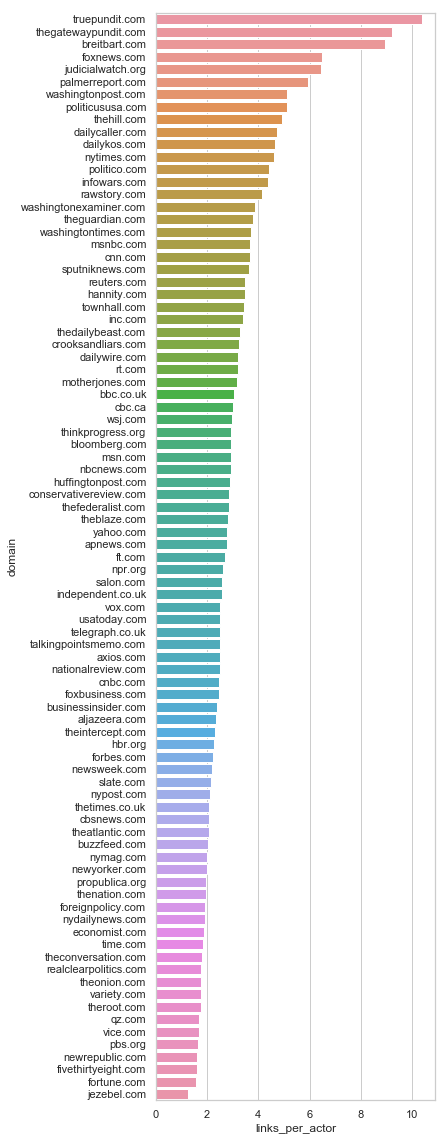

In [43]:
plt.figure(figsize=(5,20))
sns.barplot(x='links_per_actor', y='domain', data=links_actors)

# Links per article

In [50]:
links_articles = links.merge(articles, on='domain', suffixes=('_links', '_articles'))

In [51]:
links_articles['links_per_article'] = links_articles.count_links / links_articles.count_articles
links_articles.sort_values('links_per_article', ascending=False, inplace=True)

In [52]:
links_articles.head(10)

,count_links,domain,count_articles,links_per_article
48,1000671,judicialwatch.org,2887,346.612747
59,717021,theintercept.com,4839,148.175449
77,353267,propublica.org,2771,127.487189
18,2517069,thegatewaypundit.com,20240,124.361117
3,8753521,thehill.com,92797,94.329784
10,3435901,politico.com,41960,81.885153
44,1065809,theroot.com,14178,75.173438
66,537216,palmerreport.com,7970,67.404768
50,978633,motherjones.com,15054,65.008171
37,1340010,thinkprogress.org,21688,61.785780


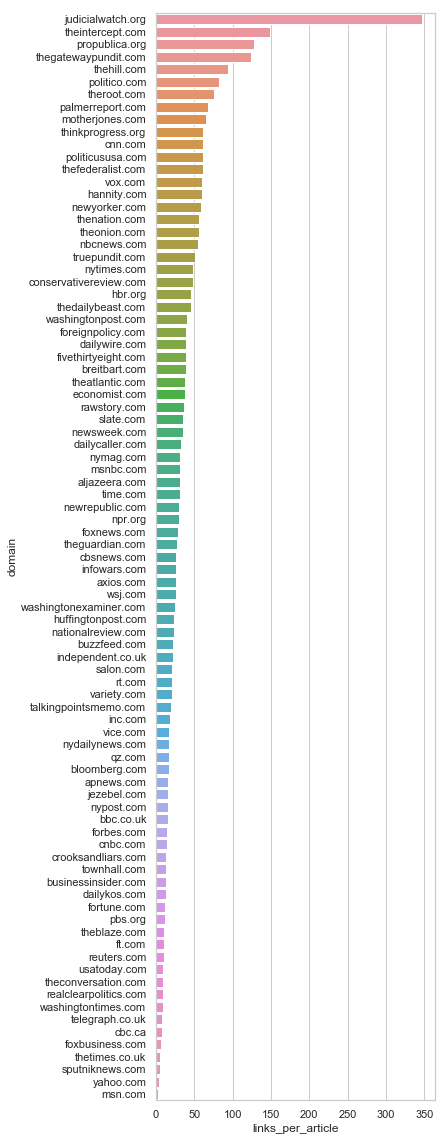

In [54]:
plt.figure(figsize=(5,20))
sns.barplot(x='links_per_article', y='domain', data=links_articles)